While the entire market has been consumed by a bearish sentiment, ETH has been hit particularly hard as its key support levels have been breached and have yet to be retested. In this notebook we will look at the ETH market to determine whether now is a good entry point. Main consideration will be retracement, volume, support levels and RSI. 

In [1]:
from pandas_datareader import data
import numpy as np 
import scipy as sp 
import pandas as pd 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.notebook_repr_html', True)

from datetime import date, datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})  

from cryptocompare import get_daily_trades
from indicators import *

import requests
import talib
import plot

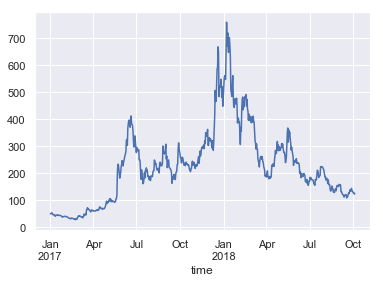

In [16]:
df = get_daily_trades('ZEC')[datetime(2017,1,1):]
df.close.plot()

Retracement 

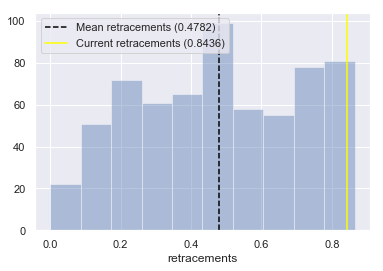

In [17]:
df['prev_ath'] = df.apply(lambda d: df[:d.name].high.max(), axis=1)
df['cycle_bottom'] = df.apply(lambda d: df[df[df.prev_ath==d.prev_ath].index[0]:d.name].low.min(), axis=1)
df['time_since_ath'] = df.apply(lambda d: (d.name - df[df.prev_ath==d.prev_ath].index[0]).days , axis=1)
df['time_since_bottom'] = df.apply(lambda d: (d.name - df[df.cycle_bottom==d.cycle_bottom].index[0]).days , axis=1)
df['retracements'] = df.apply(lambda d: (d.prev_ath - d.close)/d.prev_ath, axis=1)
plot.hist(df.retracements, plot_last=True)

Volume

In [18]:
lookback = 30

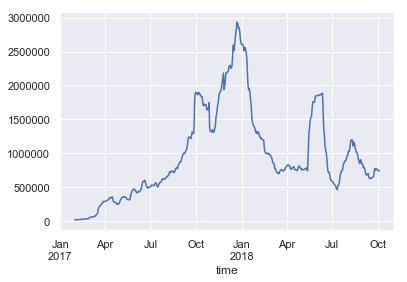

In [19]:
df.volumefrom.rolling(lookback).sum().plot()

In [20]:
df.volumefrom.rolling(lookback).sum().describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
volumefrom,613.0,974055.533785,667839.567553,23370.34,524679.89,777478.24,1316781.98,2932091.41


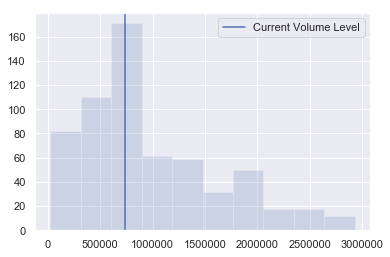

In [21]:
df.volumefrom.rolling(lookback).sum().hist(alpha=.2)
plt.axvline(df.volumefrom.rolling(lookback).sum()[-1], label='Current Volume Level')
plt.legend()

Support 

In [22]:
aths = df[df.prev_ath.diff(2)==0].prev_ath.value_counts().to_frame().reset_index().rename(columns={'index':'price','prev_ath':'days'})
aths.index = [df[df.prev_ath==a].sort_index().index[0] for a in aths.price]
aths = aths.sort_index()
aths['next_ath_date'] = aths.reset_index().shift(-1)['index'].values
premium = 1
aths['retested'] = aths.apply(lambda a: 
    df[a.next_ath_date:][df[a.next_ath_date:].low <= a.price*premium].index[0] if any(df[a.next_ath_date:].low <= a.price*premium) else None, axis=1)
pct_retested = round((~aths.retested.isnull()).sum()/aths.shape[0],4)*100
print('{}% of all time highs retested'.format(pct_retested)) 
bottoms = df[df.cycle_bottom.diff(2)==0].cycle_bottom.value_counts().to_frame().reset_index().rename(columns={'index':'price','cycle_bottom':'days'})
bottoms.index = [df[df.cycle_bottom==b].sort_index().index[0] for b in bottoms.price]
bottoms = bottoms.sort_index()
bottoms['next_bottom_date'] = bottoms.reset_index().shift(-1)['index'].values
discount = .95
bottoms['retested'] = bottoms.apply(lambda b:
    df[b.next_bottom_date:][df[b.next_bottom_date:].high >= b.price*discount].index[0] if any(df[b.next_bottom_date:].high >= b.price*discount) else None, axis=1)
pct_retested = round((~bottoms.retested.isnull()).sum()/bottoms.shape[0], 4)*100
print('{}% of cycle bottoms retested'.format(pct_retested))


100.0% of all time highs retested
100.0% of cycle bottoms retested


In [23]:
bottoms

,price,days,next_bottom_date,retested
2017-01-05,44.01,4,2017-01-11,2017-01-11
2017-01-11,38.85,13,2017-01-26,2017-01-26
2017-01-26,37.11,9,2017-02-09,2017-02-09
2017-02-09,32.00,1,2017-02-13,2017-02-13
2017-02-13,30.03,6,2017-02-21,2017-02-21
2017-02-21,22.00,23,2017-03-18,2017-03-18
2017-03-18,45.00,38,2017-05-01,2017-05-01
2017-05-01,76.00,2,2017-05-09,2017-05-09
2017-05-09,85.01,10,2017-05-22,2017-05-22
2017-05-22,99.99,14,2017-06-15,2017-06-15


RSI

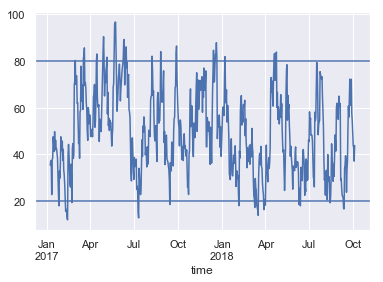

In [24]:
df['RSI'] = talib.RSI(df.close, timeperiod=7)
df.RSI.plot()
plt.axhline(20)
plt.axhline(80)

IndexError: index 0 is out of bounds for axis 0 with size 0

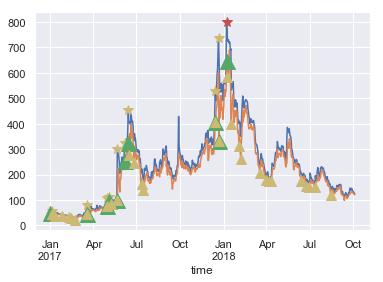

In [25]:
ax=df.high.plot()
df.low.plot()
df.loc[aths[(~aths.retested.isnull())&(~aths.next_ath_date.isnull())].index].high.plot(marker='*', ls='', markersize=10, color='y', label='Untested ATH')
df.loc[aths[(aths.retested.isnull())|(aths.next_ath_date.isnull())].index].high.plot(marker='*', ls='', markersize=10, color='r', label='Retested ATH')
df.loc[aths.retested.dropna()].low.plot(marker='^', ls='', markersize=15, label='Retracement to previous ATH')
df.loc[bottoms[(~bottoms.retested.isnull())&(~bottoms.next_bottom_date.isnull())].index].low.plot(marker='^', ls='', markersize=10, color='y', label='Breached cycle bottom')

ymin, ymax = ax.get_ybound()
# cycle bottom that has yet to be retested 
cb_to_retest = df.loc[bottoms[(bottoms.retested.isnull())|(bottoms.next_bottom_date.isnull())].index]
#for time, p in cb_to_retest.iterrows():#.plot(marker='s', ls='', markersize=10, color='r')
    #ax.fill_between(df[time:].index, df.loc[time].close, p.low, alpha=0.2, color='orange')
breached_support = bottoms[bottoms.retested.isnull()].sort_values('price', ascending=False)
time_of_highest_breached_support = breached_support.index[0]
fill_df = df[time_of_highest_breached_support:]
fill_condition = fill_df.close < breached_support.price[0]
ax.fill_between(
    fill_df.index,
    fill_df.close,
    breached_support.price[0],
    where = fill_condition,
    color='orange', alpha=0.2
)
#ann_x = (fill_df[fill_condition].index[0] + fill_df.index[-1])/2
pct_off_support = 100 * round((breached_support.price[0] - fill_df.close[-1])/breached_support.price[0], 2)
ax.annotate('{}%'.format(pct_off_support), [fill_df.index[-45], breached_support.price[0]])
df.loc[bottoms[bottoms.retested!=bottoms.next_bottom_date].retested.dropna()].high.plot(marker='v', ls='', markersize=15, label='Retracement to previous cycle bottom')
df[df.RSI <= 20].close.plot(marker='^', ls='', label='RSI below 20 indicator')
ax.legend()


In [ ]:
time_of_highest_breached_support = bottoms[bottoms.retested.isnull()].sort_values('price', ascending=False).index[0]